In [1]:
!git clone -b master https://github.com/sloumotion/hunting_grounds.git

Cloning into 'hunting_grounds'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 130 (delta 45), reused 116 (delta 37), pack-reused 0
Receiving objects: 100% (130/130), 101.64 KiB | 1.61 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [2]:
%cd hunting_grounds
!git fetch
!git checkout master
!git pull
%cd ..

/content/hunting_grounds
Already on 'master'
Your branch is up to date with 'origin/master'.
Already up to date.
/content


In [3]:
!apt-get install tree
!tree hunting_grounds

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
hunting_grounds
├── agent
│   ├── cnn_agent.py
│   ├── q_table.py
│   └── trainer.py
├── documentation
│   └── pictures
│       └── hunting_grounds.png
├── environment
│   ├── hunting_grounds.py
│   ├── __init__.py
│   └── utils
│       ├── __init__.py
│       └── visualizer.py
├── __init__.py
├── notebooks
│   ├── trainer.ipynb
│   └── world.py
├── README.md
├── results
│   └── utils
│       └── saver.py
├── server
│   ├── __init__.py
│   ├── multiprocessor.py
│   └── server.py
├── trainer
│   └── __init__.py
├── trainer.py
└── training
    └── trainer.py

11 directories, 19 files


In [0]:
from hunting_grounds.environment.hunting_grounds import HuntingGrounds as Environment
from hunting_grounds.agent.cnn_agent import CnnAgent as Agent

world_dimensions = (10, 10)

environment = Environment(world_dimensions, headless=True)
agent = Agent(world_dimensions, 5, 1000)

In [0]:
  def run_until_terminal(environment, agent, exploration_probability=0.,
                         max_steps=100):

      experiences = []

      state = environment.get_state()

      terminal = False

      step = 1

      while not terminal:

          if exploration_probability > np.random.random():
              action = np.random.randint(5)
          else:
              action = agent.predict(state)

          reward, terminal = environment.step(action)

          if step >= max_steps and not terminal:
              terminal = True
              reward = -1

          next_state = environment.get_state()

          experience = {"s": state, "a": action, "r": reward,
                        "s_": next_state, "t": terminal}

          experiences.append(experience)

          state = next_state

          step += 1

      return experiences


In [0]:
from tqdm import trange
import numpy as np

In [9]:
epochs = 100

statistics = {"steps": [], "reward": []}

for epoch in trange(epochs):

    environment.reset()
    
    if epoch % 50 == 0:
        experiences = run_until_terminal(environment, agent)

        reward = sum([e["r"] for e in experiences])
        steps = len(experiences)

        statistics["reward"].append(reward)
        statistics["steps"].append(steps)
        
    experiences = run_until_terminal(environment, agent, 1 - (epoch / epochs))

    agent.add_experience(experiences)
    

    agent.train()

100%|██████████| 100/100 [00:08<00:00,  6.52it/s]


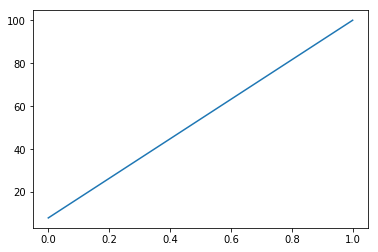

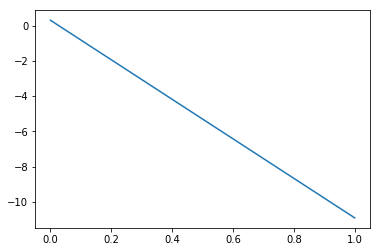

In [10]:
import matplotlib.pyplot as plt

plt.plot(statistics["steps"])

plt.figure()
plt.plot(statistics["reward"])